# 이동평균선(Moving Average)
- 주식시장이나 파생상품시장에서 기술적 분석을 할 때 쓰이는 기본 도구 중 하나.
- 거래액, 매매대금, 주가 등 다양한 분야에서 접목할 수 있다. 
- 목적 : 과거의 평균적 수치에서 현상을 파악(주로 추세)하여 현재의 매매와 미래의 예측에 접목할 수 돕는 것
- 단순이평(SMA)이 자주 쓰이지만 지수평균(EMA), 가중평균(WMA) 등을 사용하는 경우도 있다.

## 퀀트투자
- 증권사나 기업에서 제공하는 모든 객관적인 수치 지표를 가지고 수학적, 통계적 기법을 활용해 투자 종목을 발굴하는 투자 방법
- 이동평균선
    - 주식시장 파생상품시장에서 기술적 분석을 할 때 쓰이는 기본 도구
    - 거래액, 매매 대금, 생산량 등의 예측에 다양한 예측에 사용
    - 주식시장은 주말을 제외한 5일간 매매가 이루어 지고 5일 이평선은 1주일간의 주가의 흐름 파악, 20일 이평선은 1달간의 주가의 흐름 파악, 240일 이평선은 약 1년간의 주가의 흐름을 파악하는 지표이다.
    - 5일, 20일 이평선은 주로 '단기스윙'매매에 이용되며, 60일,120일 이평선은 중장기 매매에 이용된다.
    - 이동평균선 매매기법
        - 골든크로스 : 단기이동평균선이 장기이동평균선을 뚫고 상승하는 것
            - ex)20일 이평선이 60일 이평선을 뚫고 상승하는 겨우
        - 데드크로스 : 단기이동평균선이 장기이동평균선을 뚫고 하락하는 것
            - ex)20일 이평선이 60일 이평선을 뚫고 하락하고있다면 앞으로 주가가 계속 하락할 가능성이 높다.
    - 종류
        - 단순 이평선(SMA): 일반적으로 생각하는 평균과 같다. 몇 개의 데이터를 이용해서 평균을 구하느냐가 변수인데, N개의 데이터를 이용하면 N이동평균이라고 한다. N개의 종가를 모두 더한 다음 N으로 나누는 방식이다.
        - 지수 이평선(EMA)
        - 가중 이평선(WMA)
- 그외
    - 머신러닝 투자
    - 딥러닝 투자

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def seldata(cols=['sday','sclose'],where='where sday>"2022-04-01" order by sday asc'):
    fname='_db/nstock.db'
    with sqlite3.connect(fname) as conn:
        cur=conn.cursor()
        coltxt=','.join(cols)
        sql='select '+coltxt+' from stockdb '+where
        print(sql)
        res=cur.execute(sql).fetchall()
    return res

res=seldata()    
res[:5]

select sday,sclose from stockdb where sday>"2022-04-01" order by sday asc


[('2022-04-04', 117000),
 ('2022-04-05', 116500),
 ('2022-04-06', 113000),
 ('2022-04-07', 113500),
 ('2022-04-08', 112000)]

In [4]:
cols=['sday','sclose']
df = pd.DataFrame(res,columns=cols)
df.tail()

,sday,sclose
23,2022-05-06,107500
24,2022-05-09,107500
25,2022-05-10,110000
26,2022-05-11,110500
27,2022-05-12,110500


In [5]:
mdf=df.set_index('sday')
mdf.tail()

,sclose
sday,
2022-05-06,107500
2022-05-09,107500
2022-05-10,110000
2022-05-11,110500
2022-05-12,110500


<AxesSubplot:xlabel='sday'>

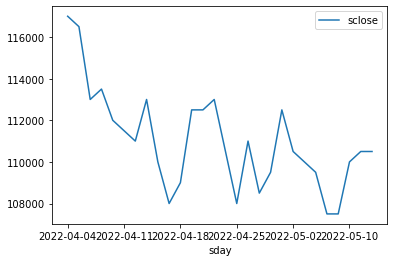

In [6]:
mdf.plot()

<AxesSubplot:xlabel='sday'>

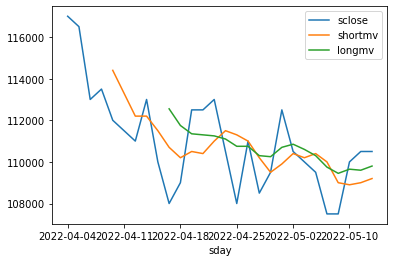

In [7]:
#window:몇개씩 연산할지 입력, mean:평균내라
mdf['shortmv']=mdf['sclose'].rolling(window=5).mean()
mdf['longmv']=mdf['sclose'].rolling(window=10).mean()
mdf.plot()

#### 기간이동 계산(rolling함수)예제

- rolling 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하여 그 window안의 값을 추가 메서드를 통해 계산하는 메서드
- df.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method='single')
    - window : 계산할 창(window)의 크기 입니다. 열 기준으로 계산할 경우 행의 수입니다.
    - min_periods : 계산할 최소 크기(기간). window 안의 값의 수가 min_periods의 값보다 작을경우 NaN을 출력합니다.
    - center : {True / False} 레이블을 window의 중간에 둘지 여부입니다. 기본값은 False로 레이블이 창 우측에 위치합니다.
    - win_type : {'triang' / 'gaussian' / ...} 가중치를 넣어 계산할 경우 계산 방식 입니다. 때에따라 연산 메서드에 추가 인수를 지정해야할수도 있습니다.
    - on : 시계열 인덱스나, 시계열과 유사한 열이 있을 경우 이 열을 기준으로 rolling을 수행할 수 있습니다.
    - closed : {'left' / 'right' / 'both' / 'neither'} window가 닫히는 방향.
    - method :{'single' / 'table'} numba 를 이용하여 테이블 계산을 진행하여 속도를 높힐지 여부입니다.

In [14]:
period = pd.period_range(start='2022-01-13 00:00:00',end='2022-01-13 02:30:00',freq='30T')
data = {'col1':[1,2,3,4,5,6],'col2':period}
idx = ['row1','row2','row3','row4','row5','row6']
idf = pd.DataFrame(data= data, index = idx)
print(idf)

      col1              col2
row1     1  2022-01-13 00:00
row2     2  2022-01-13 00:30
row3     3  2022-01-13 01:00
row4     4  2022-01-13 01:30
row5     5  2022-01-13 02:00
row6     6  2022-01-13 02:30


In [10]:
print(idf.rolling(window=3).sum())
# min_period의 크기는 지정하지 않을경우 window크기와 동일하므로 NaN출력
# 6.0=# 1행, 2행, 3행의 sum값 출력

      col1
row1   NaN
row2   NaN
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [11]:
# 데이터가 한개라도 존재하면 연산 실행
print(idf.rolling(window=3, min_periods=1).sum())

      col1
row1   1.0
row2   3.0
row3   6.0
row4   9.0
row5  12.0
row6  15.0


In [12]:
# closed는 계산을 닫는 위치 지정.
# 만약 6행기준으로 window=3이면 
# left : 3 ≤ x < 6
# right : 3 < x ≤ 6
# both : 3 ≤ x ≤ 6
# neither : 3 < x < 6

### 이동평균석 투자 전략

In [20]:
mdf

,sclose,shortmv,longmv
sday,,,
2022-04-04,117000,NaN,NaN
2022-04-05,116500,NaN,NaN
2022-04-06,113000,NaN,NaN
2022-04-07,113500,NaN,NaN
2022-04-08,112000,114400.0,NaN
2022-04-11,111500,113300.0,NaN
2022-04-12,111000,112200.0,NaN
2022-04-13,113000,112200.0,NaN
2022-04-14,110000,111500.0,NaN


In [22]:
findex=mdf.iloc[:1,:].index[0]
findex

'2022-04-04'

In [19]:
lindex=mdf.iloc[-1,:].index[0]
lindex

'sclose'

In [25]:
for i,row in mdf.iloc[10:,:].iterrows():
    print(row)

sclose     109000.0
shortmv    110200.0
longmv     111750.0
Name: 2022-04-18, dtype: float64
sclose     112500.0
shortmv    110500.0
longmv     111350.0
Name: 2022-04-19, dtype: float64
sclose     112500.0
shortmv    110400.0
longmv     111300.0
Name: 2022-04-20, dtype: float64
sclose     113000.0
shortmv    111000.0
longmv     111250.0
Name: 2022-04-21, dtype: float64
sclose     110500.0
shortmv    111500.0
longmv     111100.0
Name: 2022-04-22, dtype: float64
sclose     108000.0
shortmv    111300.0
longmv     110750.0
Name: 2022-04-25, dtype: float64
sclose     111000.0
shortmv    111000.0
longmv     110750.0
Name: 2022-04-26, dtype: float64
sclose     108500.0
shortmv    110200.0
longmv     110300.0
Name: 2022-04-27, dtype: float64
sclose     109500.0
shortmv    109500.0
longmv     110250.0
Name: 2022-04-28, dtype: float64
sclose     112500.0
shortmv    109900.0
longmv     110700.0
Name: 2022-04-29, dtype: float64
sclose     110500.0
shortmv    110400.0
longmv     110850.0
Name: 2022

In [26]:
def simStock(mdf):
    findex=mdf.iloc[:1,:].index[0]
    lindex=mdf.iloc[-1:,:].index[0]
    lindex
    invest=200000
    beforePos=-1
    beforeHold=0

    for i,row in mdf.iloc[10:,:].iterrows():
        if(row['shortmv']>=row['longmv']):
            nowpos=1 # short 상위
        else:
            nowpos=-1 # short 하위
        if beforePos==-1 and nowpos==1 and beforeHold==0:
            timing=1# 매수타이밍
            hold=1
            mdf.loc[i,'cash']=-row['sclose']
            mdf.loc[i,'hold']=1
        elif beforePos==1 and nowpos==-1 and beforeHold==1:
            timing=-1# 매수타이밍
            hold=0
            mdf.loc[i,'cash']=row['sclose']
            mdf.loc[i,'hold']=0
        else:
            mdf.loc[i,'cash']=0
            timing=0 # 홀드
            hold=beforeHold
            mdf.loc[i,'hold']=beforeHold
        beforeHold=hold
        beforePos=nowpos
        mdf.loc[findex,'cash']=invest
        mdf['cumcash']=mdf['cash'].cumsum()
        mdf['balalce']=mdf['sclose']*mdf['hold']+mdf['cumcash']
    mdf.tail()
    ecash=mdf.loc[lindex,'balalce']-invest
    erate=ecash/invest
    return(invest,ecash,erate)

In [27]:
simStock(mdf)

(200000, -4000.0, -0.02)